In [ ]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator #for image augmentation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
# for accuracy and loss graph
import matplotlib.pyplot as plt
 
import tensorflow

In [ ]:
print(keras.__version__)
print(tensorflow.__version__)

2.4.3
2.4.1


In [ ]:
train_data_path = "/content/drive/MyDrive/My ML Project /DL Project/dataset/train"
validation_data_path = "/content/drive/MyDrive/My ML Project /DL Project/dataset/valid"

In [ ]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [ ]:
# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(200, 200), # all images will be resized to 150x150
                                      batch_size=128,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 3649 images belonging to 2 classes.


In [ ]:
training_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [ ]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(200,200),
                                  batch_size=128,
                                  class_mode='binary')

Found 806 images belonging to 2 classes.


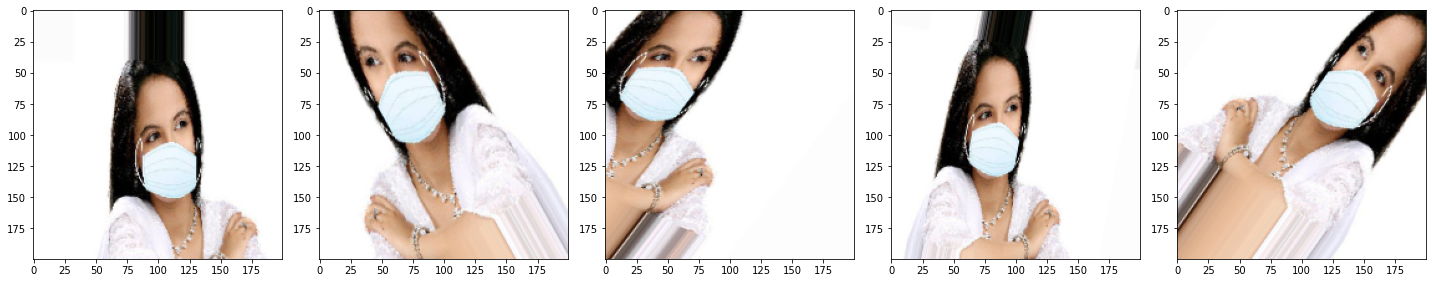

In [ ]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [ ]:
# save best model using vall accuracy
model_path = '/content/drive/MyDrive/My ML Project /DL Project/mask.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(4,4)),
                                    keras.layers.Conv2D(filters=64, kernel_size=4),
                                    keras.layers.MaxPooling2D(pool_size=(3,3)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=2),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])
 
 
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#cnn_model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=2, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 14.25

Epoch 1/2
 1/29 [>.............................] - ETA: 42:07 - loss: 0.6960 - accuracy: 0.5469

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


29/29 [==============================] - 2524s 87s/step - loss: 0.6438 - accuracy: 0.6143 - val_loss: 0.2259 - val_accuracy: 0.9119

Epoch 00001: val_accuracy improved from -inf to 0.91191, saving model to /content/drive/MyDrive/My ML Project /DL Project/mask.h5
Epoch 2/2
29/29 [==============================] - 45s 2s/step - loss: 0.3328 - accuracy: 0.8791 - val_loss: 0.2056 - val_accuracy: 0.9367

Epoch 00002: val_accuracy improved from 0.91191 to 0.93672, saving model to /content/drive/MyDrive/My ML Project /DL Project/mask.h5


In [ ]:
cnn_model.save('/content/drive/MyDrive/My ML Project /DL Project/mask_last_model.h5')

In [ ]:
import datetime
datetime.datetime.now()
 # import the libraries as shown below
 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
 
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
import tensorflow
import keras
print(tensorflow.__version__)
print(keras.__version__)

2.4.1
2.4.3


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
 
train_path = "/content/drive/MyDrive/My ML Project /DL Project/dataset/train"
valid_path  = "/content/drive/MyDrive/My ML Project /DL Project/dataset/valid"

In [ ]:
# Import the ResNet152V2 library as shown below and add preprocessing layer to the front of ResNet152V2
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

234553344/234545216 [==============================] - 3s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob("/content/drive/MyDrive/My ML Project /DL Project/dataset/train/*")

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)
 
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3649 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 806 images belonging to 2 classes.


In [ ]:
# save best model using vall accuracy
model_path = '/content/drive/MyDrive/My ML Project /DL Project/resnet152v2.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks_list
)


Epoch 1/10
 88/115 [=====================>........] - ETA: 6:05 - loss: 0.2633 - accuracy: 0.9663

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


115/115 [==============================] - 1903s 16s/step - loss: 0.2623 - accuracy: 0.9704 - val_loss: 0.5928 - val_accuracy: 0.9777

Epoch 00001: val_accuracy improved from -inf to 0.97767, saving model to /content/drive/MyDrive/My ML Project /DL Project/resnet152v2.h5
Epoch 2/10
115/115 [==============================] - 66s 573ms/step - loss: 0.5063 - accuracy: 0.9888 - val_loss: 0.1047 - val_accuracy: 0.9963

Epoch 00002: val_accuracy improved from 0.97767 to 0.99628, saving model to /content/drive/MyDrive/My ML Project /DL Project/resnet152v2.h5
Epoch 3/10
115/115 [==============================] - 65s 567ms/step - loss: 0.0990 - accuracy: 0.9942 - val_loss: 0.3784 - val_accuracy: 0.9913

Epoch 00003: val_accuracy did not improve from 0.99628
Epoch 4/10
115/115 [==============================] - 65s 565ms/step - loss: 0.0630 - accuracy: 0.9968 - val_loss: 0.4008 - val_accuracy: 0.9938

Epoch 00004: val_accuracy did not improve from 0.99628
Epoch 5/10
115/115 [====================

In [ ]:
from tensorflow.keras.models import load_model
 
model.save('/content/drive/MyDrive/My ML Project /DL Project/last_resnet152v2.h5')

In [ ]:
datetime.datetime.now()

datetime.datetime(2021, 2, 13, 3, 1, 44, 761485)

In [ ]:
#Transfer learning - resnet152V2 .ipynb
 
# import packages
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [ ]:
#load model # Accuracy=99.3 , validation Accuracy = 99.3 # heavy model, size =226MB
model_res = load_model('/content/drive/MyDrive/My ML Project /DL Project/last_resnet152v2.h5') #resnet transfer learning
 
# model accept below hight and width of the image
img_width, img_hight = 224, 224
 
#------------------------------or-----------------------
 
#Own cnn  architecture - mask detection CNN.ipynb
 
# import packages
import cv2
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [ ]:
#load model # Accuracy=97.4 , validation Accuracy = 99.1 # very light model, size =5MB
model = load_model('/content/drive/MyDrive/My ML Project /DL Project/last_resnet152v2.h5') # cnn

In [ ]:
# model accept below hight and width of the image
img_width, img_hight = 200, 200

In [ ]:
# Load the Cascade face Classifier
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [ ]:

 
#startt  web cam
cap = cv2.VideoCapture(0) # for webcam
#cap = cv2.VideoCapture('videos/Mask - 34775.mp4') # for video
 
img_count_full = 0
 
#parameters for text
# font 
font = cv2.FONT_HERSHEY_SIMPLEX 
# org 
org = (1, 1)
class_lable=' '      
# fontScale 
fontScale = 1 #0.5
# Blue color in BGR 
color = (255, 0, 0) 
# Line thickness of 2 px 
thickness = 2 #1
 
#sart reading images and prediction
while True:
    img_count_full += 1
     
    #read image from webcam
    responce, color_img = cap.read()
    #color_img = cv2.imread('sandeep.jpg')
     
    #if respoce False the break the loop
    if responce == False:
        break    
     
    # Convert to grayscale
    gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
     
    # Detect the faces
    faces = face_cascade.detectMultiScale(gray_img, 1.1, 6) # 1.1, 3) for 1.mp4
     
    #take face then predict class mask or not mask then draw recrangle and text then display image
    img_count = 0
    for (x, y, w, h) in faces:
        org = (x-10,y-10)
        img_count +=1 
        color_face = color_img[y:y+h,x:x+w] # color face
        cv2.imwrite('faces/input/%d%dface.jpg'%(img_count_full,img_count),color_face)
        img = load_img('faces/input/%d%dface.jpg'%(img_count_full,img_count), target_size=(img_width,img_hight))
         
        img = img_to_array(img)/255
        img = np.expand_dims(img,axis=0)
        pred_prob = model.predict(img)
        #print(pred_prob[0][0].round(2))
        pred=np.argmax(pred_prob)
             
        if pred==0:
            print("User with mask - predic = ",pred_prob[0][0])
            class_lable = "Mask"
            color = (255, 0, 0)
            cv2.imwrite('faces/with_mask/%d%dface.jpg'%(img_count_full,img_count),color_face)
                  
        else:
            print('user not wearing mask - prob = ',pred_prob[0][1])
            class_lable = "No Mask"
            color = (0, 255, 0)
            cv2.imwrite('faces/without_mask/%d%dface.jpg'%(img_count_full,img_count),color_face)
                 
        cv2.rectangle(color_img, (x, y), (x+w, y+h), (0, 0, 255), 3)
        # Using cv2.putText() method 
        cv2.putText(color_img, class_lable, org, font,  
                                   fontScale, color, thickness, cv2.LINE_AA) 
     
    # display image
    cv2.imshow('LIVE face mask detection', color_img)
     
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
 
# Release the VideoCapture object
cap.release()
cv2.destroyAllWindows()

In [ ]:
#Own cnn  architecture - mask detection CNN.ipynb
 
# import packages
import cv2
import os
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
 
#load model # Accuracy=97.4 , validation Accuracy = 99.1 # very light model, size =5MB
model = load_model('/content/drive/MyDrive/My ML Project /DL Project/last_resnet152v2.h5') # cnn
 
# model accept below hight and width of the image
img_width, img_hight = 200, 200
 
# Load the Cascade face Classifier
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
 
#parameters for text
# font 
font = cv2.FONT_HERSHEY_SIMPLEX 
# org 
org = (1, 1)
class_lable=' '      
# fontScale 
fontScale = 1 #0.5
# Blue color in BGR 
color = (255, 0, 0) 
# Line thickness of 2 px 
thickness = 2 #1
 
img_path = os.path.join('data to images')
img_list = os.listdir(img_path)
 
for img_name in img_list:
    #read image from webcam
    color_img = cv2.imread('images/%s'%img_name)
     
    #resize image with 50 % ratio
    scale = 20  
    width = int(color_img.shape[1] * scale / 100)  
    height = int(color_img.shape[0] * scale / 100)  
    dim = (width, height)  
    # resize image  
    color_img = cv2.resize(color_img, dim, interpolation=cv2.INTER_AREA) 
 
    # Convert to grayscale
    gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
 
    # Detect the faces
    faces = face_cascade.detectMultiScale(gray_img, 1.1, 6) 
 
    #take face then predict class mask or not mask then draw recrangle and text then display image
    img_count = 0
    for (x, y, w, h) in faces:
        org = (x-10,y-10)
        img_count +=1 
        color_face = color_img[y:y+h,x:x+w] # color face
        cv2.imwrite('faces/input/%dface.jpg'%(img_count),color_face)
        img = load_img('faces/input/%dface.jpg'%(img_count), target_size=(img_width,img_hight))
 
        img = img_to_array(img)/255
        img = np.expand_dims(img,axis=0)
        pred_prob = model.predict(img)
        #print(pred_prob[0][0].round(2))
        pred=np.argmax(pred_prob)
 
        if pred==0:
            print("User with mask - predic = ",pred_prob[0][0])
            class_lable = "Mask"
            color = (255, 0, 0)
            cv2.imwrite('faces/with_mask/%dface.jpg'%(img_count),color_face)
            cv2.rectangle(color_img, (x, y), (x+w, y+h), (0, 0, 255), 3)
            # Using cv2.putText() method 
            cv2.putText(color_img, class_lable, org, font,  
                                   fontScale, color, thickness, cv2.LINE_AA) 
            cv2.imwrite('faces/with_mask/%dmask.jpg'%(img_count),color_img)
 
        else:
            print('user not wearing mask - prob = ',pred_prob[0][1])
            class_lable = "No Mask"
            color = (0, 255, 0)
            cv2.imwrite('faces/without_mask/%dface.jpg'%(img_count),color_face)
            cv2.imwrite('faces/with_mask/%dno_mask.jpg'%(img_count),color_img)
 
        cv2.rectangle(color_img, (x, y), (x+w, y+h), (0, 0, 255), 3)
        # Using cv2.putText() method 
        cv2.putText(color_img, class_lable, org, font,  
                                       fontScale, color, thickness, cv2.LINE_AA) 
 
    # display image
    cv2.imshow('LIVE face mask detection', color_img)
 
    cv2.waitKey() 
 
    #close all windows
    cv2.destroyAllWindows()

FileNotFoundError: ignored